In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [7]:
clean_data = data.drop(cols_to_drop, axis=1)

In [8]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
clean_data["Sex"] = le.fit_transform(clean_data["Sex"])

In [12]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [13]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [14]:
clean_data = clean_data.fillna(clean_data['Age'].mean())

In [15]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [16]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_cols = ['Survived']

X = clean_data[input_cols]
y = clean_data[output_cols]

X.shape, y.shape

((891, 6), (891, 1))

# Entropy

In [17]:
def entropy(col):
    data, counts = np.unique(col, return_counts=True)
    # total items are also needed to find the prob
    N = float(col.shape[0])
    
    ent = 0.0
    
    for count in counts:
        p = count / N
        ent += p * np.log2(p)

    return -ent

In [18]:
col = np.array([2,2,3,3,4,4,4])
entropy(col)

1.5566567074628228

# Information Gain

In [19]:
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([], columns=x_data.columns)
    
    for xi in range(x_data.shape[0]):
        val = x_data[fkey].iloc[xi]
        
        if val > fval:
            x_right = x_right.append(x_data.loc[xi])
        else:
            x_left = x_left.append(x_data.loc[xi])
        
    return x_left, x_right

In [20]:
# Note: We are making a Binary Tree, hence split node into 2. 
# if a person will buy ps5 or not. Lets say split this across salaries. fkey = Salaries. 
# say you want to split like salary < 10 lac (left child) & sal > 10 lac (right child): fval = 10
def information_gain(x_data, fkey, fval):
    left, right = divide_data(x_data, fkey, fval)
    
    # % of examples in left and right
    l = float(left.shape[0]) / x_data.shape[0]
    r = float(right.shape[0]) / x_data.shape[0]
    
    hs = entropy(x_data.Survived)
    
    igain = hs - (l * entropy(left.Survived) + r * entropy(right.Survived))
    return igain

for f in X.columns:
    print(f)
    print(information_gain(clean_data, f, clean_data[f].mean()))

# DT using Sklearn 

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [24]:
sk_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
sk_tree.score(X_test, y_test)

0.8067796610169492

In [26]:
sk_tree.predict(X_test[:10])

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [27]:
y_test[:10]

,Survived
709,1
439,0
840,0
720,1
39,1
290,1
300,1
333,0
208,1
136,1


# Custom Implementation

In [31]:
class DecisionTree:
    
    def __init__(self, depth=0, max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None # what i'm going to predict at a particular Node, say leaf node has 50 examples (40 Y and 10 N), 
                           # then target of this leaf node is Y (80% accuracy)
        
    def fit(self, X_train):
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train, ix, X_train[ix].mean())
            info_gains.append(i_gain)

        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
#         print("Making tree feature is ", self.fkey)
        
        # split data
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        # reset_index will reset the index again from starting for each subpart
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
        
        # reached leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
                
        # Stop early when depth >= max_depth
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survived"
            else:
                self.target = "Dead"
            return
    
        # Recursive Case
        self.left = DecisionTree(depth=self.depth + 1)
        self.left.fit(data_left)
        
        self.right = DecisionTree(depth=self.depth + 1)
        self.right.fit(data_right)
        
        # You can set target at every node and not just leaf node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survived"
        else:
            self.target = "Dead"
        return
    
    def predict(self, test):
        if test[self.fkey] > self.fval:
            # go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [34]:
dt = DecisionTree()

In [35]:
split = int(0.7*clean_data.shape[0])
train_data = clean_data[:split]
test_data = clean_data[split:]
test_data = test_data.reset_index(drop=True)

In [36]:
dt.fit(train_data)

In [38]:
y_pred = []
for i in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[i]))

In [39]:
y_pred[:10]

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead']

In [40]:
y_actual = test_data[output_cols]

In [41]:
data[split:][:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
625,626,0,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C


# Visualising DT

In [44]:
import pydotplus
from sklearn.externals.six import StringIO # data format
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

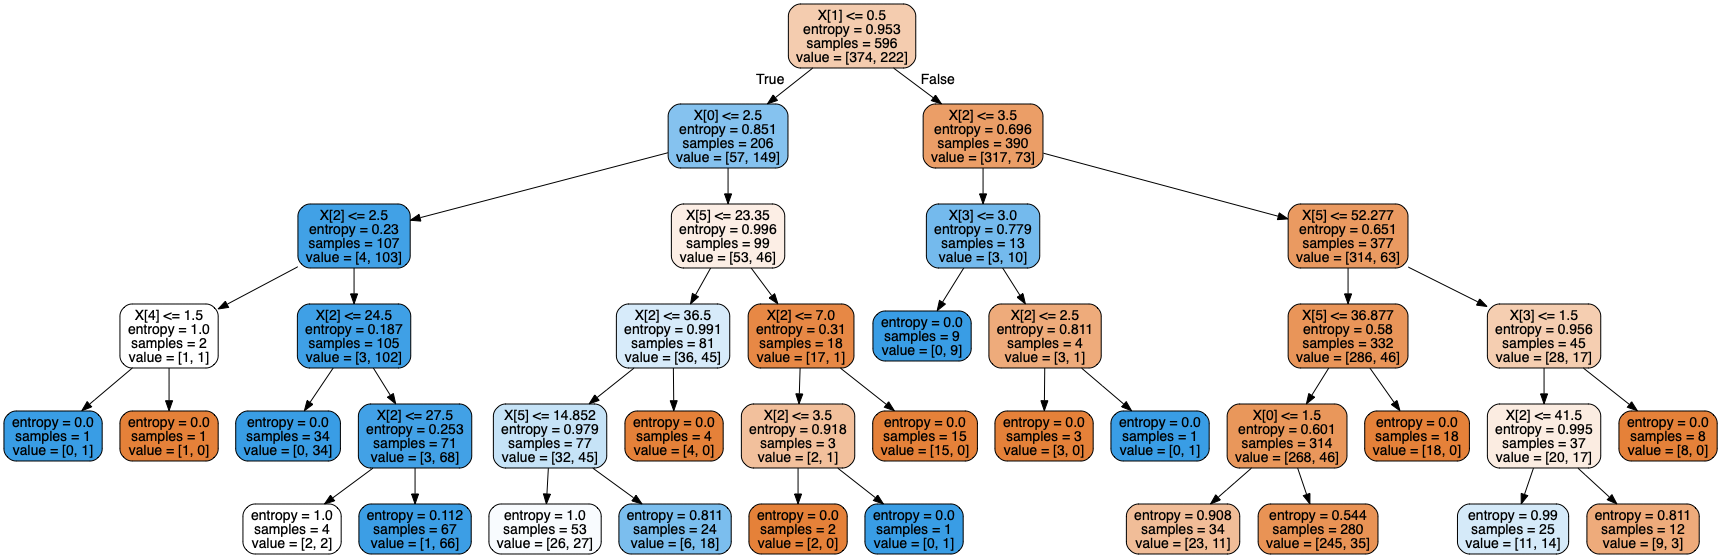

In [45]:
dot_data = StringIO()
export_graphviz(sk_tree, out_file=dot_data, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())